https://github.com/PradikshaDevi/Brest-cancer-classification-VQC/blob/main/QML-Breast%20cancer%20classification.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
d = df
X = d.drop(['target'], axis=1)
y = d['target']

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.44272026 0.18971182 0.09393163 0.06602135]


In [7]:
from sklearn.preprocessing import MinMaxScaler
X_normalized = MinMaxScaler().fit_transform(X_pca)

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(123)

train_feature, test_feature, train_labels, test_labels = train_test_split(
    X_normalized, y, train_size=0.8, random_state=123
)

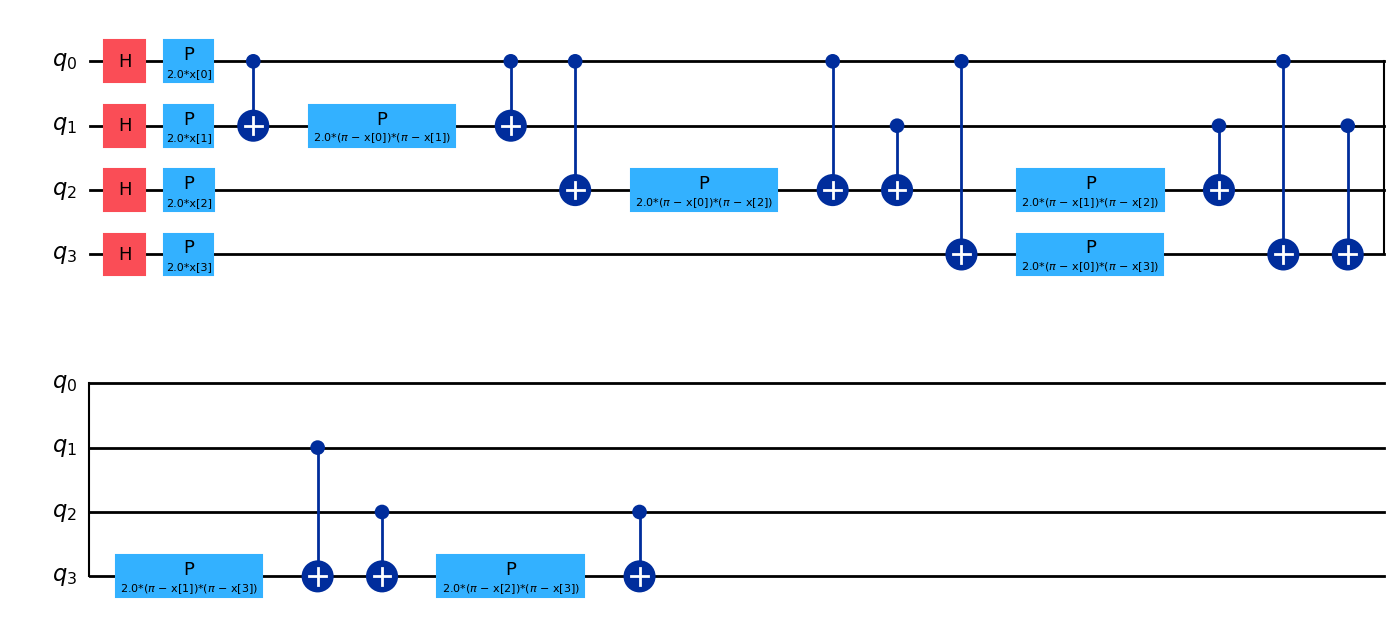

In [9]:
from qiskit.circuit.library import ZZFeatureMap

num_features = train_feature.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output='mpl', fold=20, filename='featuremap')

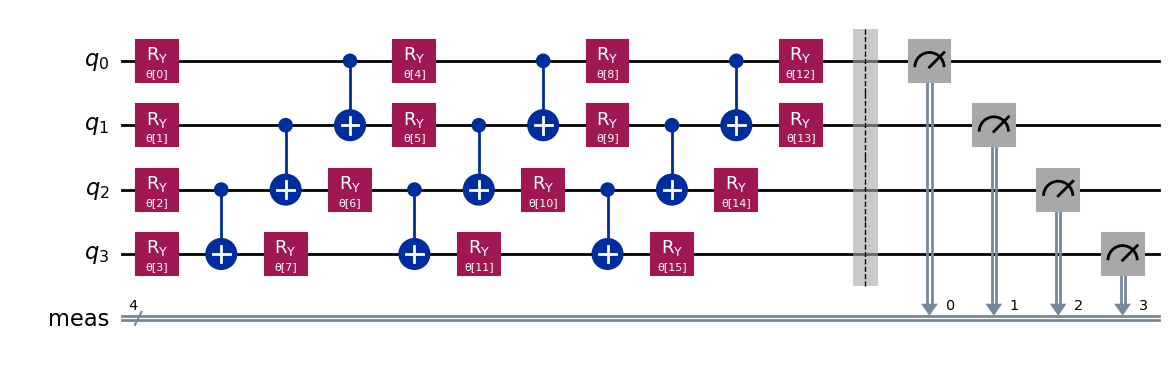

In [10]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.measure_all() 
ansatz.decompose().draw(output='mpl', fold=20, filename='ansatz')

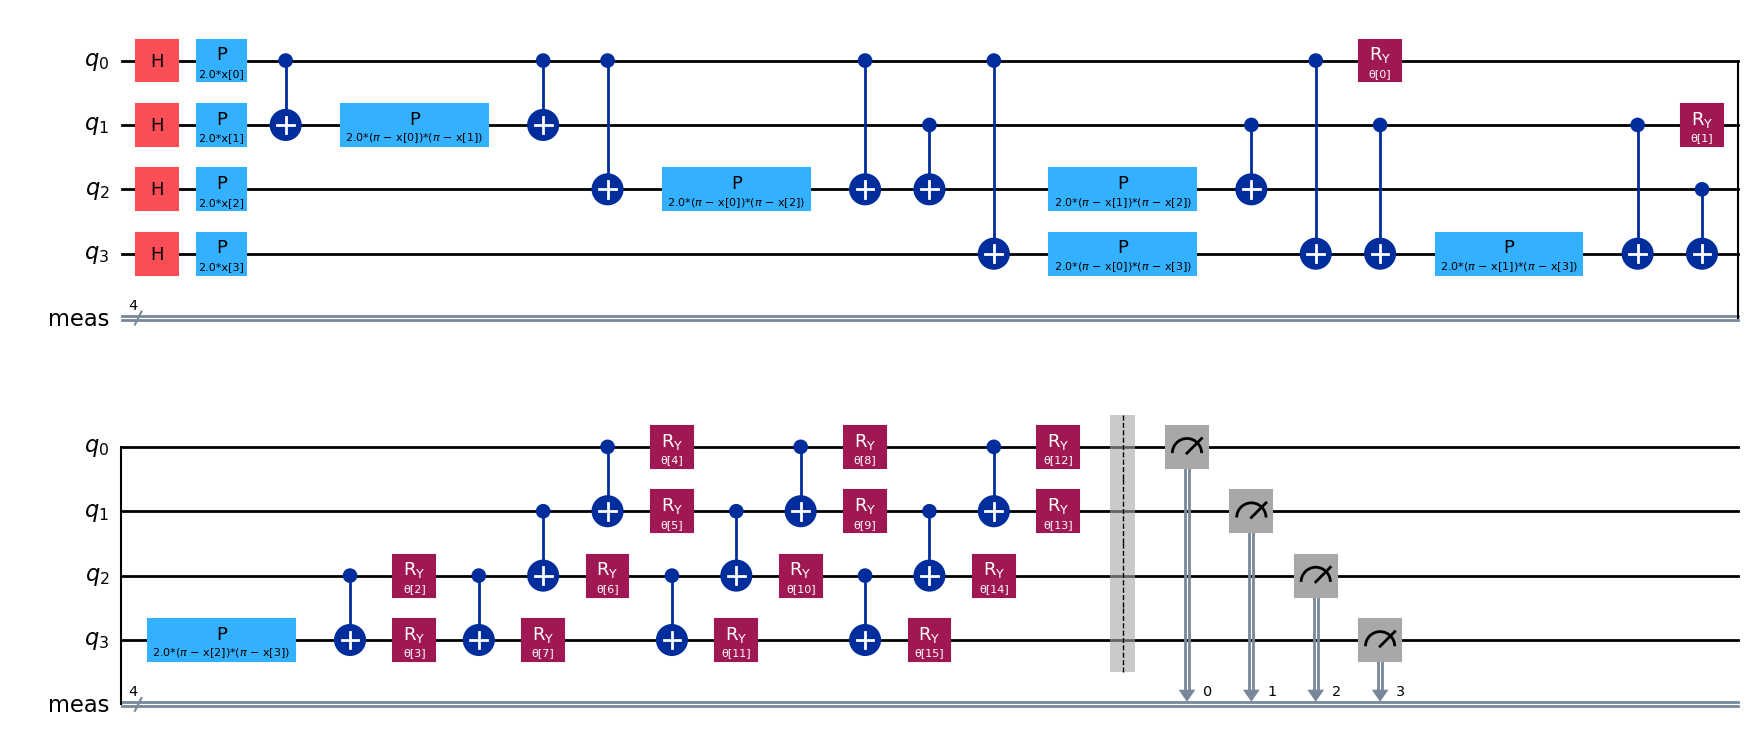

In [11]:
circuit = feature_map.compose(ansatz)
circuit.decompose().draw(output='mpl', filename='overallcircuit.png')

In [12]:

initial_point = np.random.random(ansatz.num_parameters)
initial_point

array([0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897,
       0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752,
       0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426,
       0.73799541])

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

train_labels = train_labels.to_numpy()
test_labels = test_labels.to_numpy()

train_labels_oh = encoder.fit_transform(train_labels.reshape(-1,1)).toarray()
test_labels_oh = encoder.fit_transform(test_labels.reshape(-1,1)).toarray()

In [24]:
from qiskit_aer.primitives import Sampler
from qiskit_algorithms.optimizers import SPSA
from qiskit_machine_learning.algorithms.classifiers import VQC

In [25]:
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    loss='cross_entropy',
    optimizer=SPSA(),
    initial_point=initial_point,
    sampler=Sampler()
)

In [26]:
vqc.fit(train_feature, train_labels_oh)

In [27]:
print(f'Quantum VQC test accuracy: {vqc.score(test_feature, test_labels_oh):.2f}')

Quantum VQC test accuracy: 0.71


In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
print(pca.explained_variance_ratio_)

[0.98204467 0.01617649]


In [29]:
from sklearn.preprocessing import MinMaxScaler
X_scaled_qc = MinMaxScaler().fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(X_scaled_qc, y, train_size=0.8, random_state=algorithm_globals.random_seed)

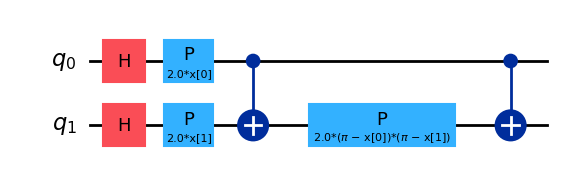

In [31]:
from qiskit.circuit.library import ZZFeatureMap

num_features = train_features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output='mpl', fold=20, filename='featuremap')

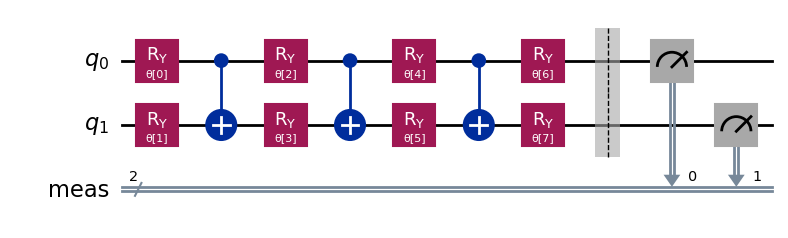

In [32]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.measure_all() 
ansatz.decompose().draw(output='mpl', fold=20, filename='ansatz')

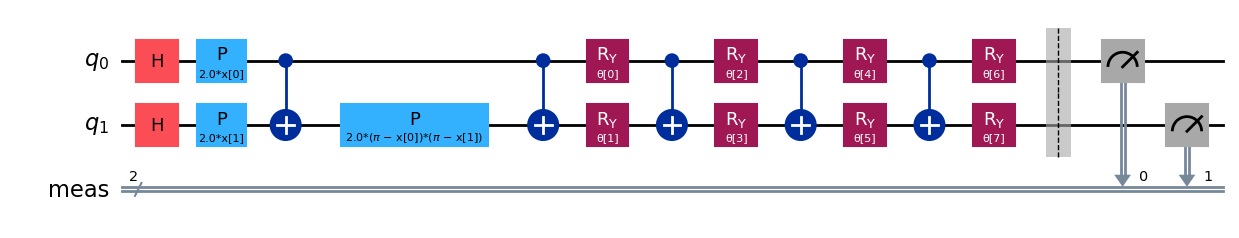

In [33]:
circuit = feature_map.compose(ansatz)
circuit.decompose().draw(output='mpl', filename='overallcircuit.png')

In [34]:
initial_point = np.random.random(ansatz.num_parameters)
initial_point

array([0.18249173, 0.17545176, 0.53155137, 0.53182759, 0.63440096,
       0.84943179, 0.72445532, 0.61102351])

In [40]:
# from qiskit_ibm_runtime import QiskitRuntimeService

# # Step 1 — Run ONCE to save your account
# QiskitRuntimeService.save_account(
#     channel="ibm_quantum",
#     token="C13f7THmojGotXbdmRjMcHFusOYmZ03OBjMs49bCOL6Z",
#     overwrite=True
# )

# # Step 2 — Load your account (every new session)
# service = QiskitRuntimeService(channel="ibm_quantum")

# # Step 3 — List available backends
# for backend in service.backends():
#     print(backend.name)

# for backend in provider.backends():
#     print(backend.name)

In [41]:
# provider = IBMProvider()

# q_computer = provider.get_backend('ibm_sherbrooke')

# # Set options to disable dynamic circuits
# sampler = BackendSampler(
#     backend=q_computer,
#     options={"transpilation": {"translation_method": "synthesis",
#                                "layout_method": "trivial"}}
# )

# vqc = VQC(
#     feature_map=feature_map,
#     ansatz=ansatz,
#     loss='cross_entropy',
#     optimizer=SPSA(),
#     initial_point=initial_point,
#     sampler=sampler
# )

In [42]:
# vqc.fit(train_features, train_labels_oh)

In [ ]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Estimator, Sampler
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import SPSA, COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
import numpy as np

# --- Step 1: Local backend setup ---
backend = AerSimulator()

# --- Step 2: Local primitives (no cloud connection needed) ---
sampler = Sampler()
estimator = Estimator()

# --- Step 3: Define circuit components ---
n_features = train_features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=n_features)
ansatz = RealAmplitudes(num_qubits=n_features, reps=2)

# --- Step 4: Initialize random parameters ---
initial_point = np.random.random(ansatz.num_parameters)

# --- Step 5: Choose optimizer (SPSA or COBYLA) ---
optimizer = SPSA(maxiter=100)
# optimizer = COBYLA(maxiter=200)

# --- Step 6: Build and train the VQC ---
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    loss='cross_entropy',
    initial_point=initial_point,
    sampler=sampler
)

vqc.fit(train_features, train_labels_oh)

# --- Step 7: Evaluate performance ---
score = vqc.score(test_features, test_labels_oh)
print(f"🧠 Quantum VQC Test Accuracy: {score:.4f}")

# --- Optional diagnostics ---
print(f"Number of parameters: {ansatz.num_parameters}")
print(f"Optimizer used: {optimizer.__class__.__name__}")
print("Initial point:", initial_point)

🧠 Quantum VQC Test Accuracy: 0.8246
Number of parameters: 6
Optimizer used: SPSA
Initial point: [0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612]
